### this feeds the aal-sphere FC to vae
* code allows using all four spheres, or picking one of them

In [4]:
# Auto-Reload for Fast Iteration
%load_ext autoreload
%autoreload 2

# Add project root to sys.path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import from base_script.py (which is in the root folder)
from base_script import *

# Import custom functions from your utils package
from utils.models import VAE, CVAE

from utils.train_utils import (
    train_vae,
    loss_function,
    get_latent_mu,
    compute_condition_distances
)

from utils.data_utils import (
    load_all_fc_data,
    preprocess_for_torch
)

from utils.utils_plotting import (
    plot_vae_losses,
    plot_latent_embedding_by_condition_and_subject,
    plot_subject_distance_comparison
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
sub_cond_path = '../subject_info.xlsx'
base_nifti_folder = '../data_FC'
condition_map = {'N': 0, 'S': 1, 'C': 2}

In [6]:
# Load and preprocess
use_roi = 0
all_corr_data, all_tms_type, all_subject_id, all_stimloc, all_session = load_all_fc_data(sub_cond_path, 
                                                               base_nifti_folder, 
                                                               mat_filename='conn_matrix_w_sphere.mat',
                                                               key_name='correlation_matrix',row_idx=use_roi)
X_tensor = preprocess_for_torch(all_corr_data)
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

[WARN] File not found: ../data_FC/NODEAP_30/S3D2/conn_matrix_w_sphere.mat
[WARN] File not found: ../data_FC/NODEAP_44/S1D1/conn_matrix_w_sphere.mat
[WARN] File not found: ../data_FC/NODEAP_83/S3D1/conn_matrix_w_sphere.mat
[WARN] File not found: ../data_FC/NODEAP_87/D0/conn_matrix_w_sphere.mat
[WARN] File not found: ../data_FC/NODEAP_88/D0/conn_matrix_w_sphere.mat
Columns with NaN: 14 / 116
Tensor shape after preprocessing: torch.Size([331, 102])


In [7]:
# Set up model, optimizer, and device
input_dim = X_tensor.shape[1]
latent_dim = 10
NUM_EPOCH = 500
LR = 3e-4
model = VAE(input_dim=input_dim, latent_dim=latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
total_loss_hist, recon_loss_hist, kld_loss_hist = train_vae(model, dataloader, optimizer, device=DEVICE, epochs=NUM_EPOCH)


===== Epoch 1 =====


Epoch 1/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 152.00it/s]


Epoch 1, Loss: 107.7599, Recon: 107.4115, KL: 0.3484

===== Epoch 2 =====


Epoch 2/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1065.38it/s]


Epoch 2, Loss: 103.8029, Recon: 103.3166, KL: 0.4863

===== Epoch 3 =====


Epoch 3/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1132.84it/s]


Epoch 3, Loss: 100.4163, Recon: 99.4520, KL: 0.9643

===== Epoch 4 =====


Epoch 4/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1074.21it/s]


Epoch 4, Loss: 94.1560, Recon: 92.1066, KL: 2.0494

===== Epoch 5 =====


Epoch 5/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1177.96it/s]


Epoch 5, Loss: 85.8880, Recon: 81.7733, KL: 4.1147

===== Epoch 6 =====


Epoch 6/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1245.78it/s]


Epoch 6, Loss: 79.0251, Recon: 72.8177, KL: 6.2074

===== Epoch 7 =====


Epoch 7/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1338.56it/s]


Epoch 7, Loss: 72.8049, Recon: 66.1222, KL: 6.6827

===== Epoch 8 =====


Epoch 8/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1200.49it/s]


Epoch 8, Loss: 68.3214, Recon: 60.8946, KL: 7.4269

===== Epoch 9 =====


Epoch 9/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1012.05it/s]


Epoch 9, Loss: 65.4843, Recon: 57.2970, KL: 8.1873

===== Epoch 10 =====


Epoch 10/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1260.76it/s]


Epoch 10, Loss: 62.9509, Recon: 54.7947, KL: 8.1562

===== Epoch 11 =====


Epoch 11/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1403.42it/s]


Epoch 11, Loss: 59.9107, Recon: 51.5374, KL: 8.3733

===== Epoch 12 =====


Epoch 12/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1265.70it/s]


Epoch 12, Loss: 57.3014, Recon: 48.3999, KL: 8.9015

===== Epoch 13 =====


Epoch 13/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1339.84it/s]


Epoch 13, Loss: 55.5395, Recon: 46.0242, KL: 9.5153

===== Epoch 14 =====


Epoch 14/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1285.34it/s]


Epoch 14, Loss: 54.4625, Recon: 44.9589, KL: 9.5036

===== Epoch 15 =====


Epoch 15/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1365.13it/s]


Epoch 15, Loss: 52.8540, Recon: 43.3194, KL: 9.5345

===== Epoch 16 =====


Epoch 16/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1198.78it/s]


Epoch 16, Loss: 51.4776, Recon: 41.8477, KL: 9.6299

===== Epoch 17 =====


Epoch 17/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1223.83it/s]


Epoch 17, Loss: 51.0039, Recon: 41.4161, KL: 9.5877

===== Epoch 18 =====


Epoch 18/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1140.97it/s]


Epoch 18, Loss: 50.1498, Recon: 40.3798, KL: 9.7700

===== Epoch 19 =====


Epoch 19/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1307.53it/s]


Epoch 19, Loss: 49.3073, Recon: 39.3827, KL: 9.9246

===== Epoch 20 =====


Epoch 20/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1274.34it/s]


Epoch 20, Loss: 49.0999, Recon: 39.2065, KL: 9.8934

===== Epoch 21 =====


Epoch 21/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1236.66it/s]


Epoch 21, Loss: 47.9605, Recon: 37.8250, KL: 10.1355

===== Epoch 22 =====


Epoch 22/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1340.81it/s]


Epoch 22, Loss: 47.5182, Recon: 37.2709, KL: 10.2472

===== Epoch 23 =====


Epoch 23/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1313.59it/s]


Epoch 23, Loss: 46.9201, Recon: 36.6060, KL: 10.3141

===== Epoch 24 =====


Epoch 24/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1265.39it/s]


Epoch 24, Loss: 46.5837, Recon: 36.1495, KL: 10.4342

===== Epoch 25 =====


Epoch 25/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1262.65it/s]


Epoch 25, Loss: 46.1731, Recon: 35.7192, KL: 10.4539

===== Epoch 26 =====


Epoch 26/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1340.46it/s]


Epoch 26, Loss: 45.6129, Recon: 35.0711, KL: 10.5418

===== Epoch 27 =====


Epoch 27/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1251.73it/s]


Epoch 27, Loss: 45.2493, Recon: 34.5500, KL: 10.6993

===== Epoch 28 =====


Epoch 28/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1109.76it/s]


Epoch 28, Loss: 44.8942, Recon: 34.1401, KL: 10.7542

===== Epoch 29 =====


Epoch 29/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1135.91it/s]


Epoch 29, Loss: 44.5301, Recon: 33.7663, KL: 10.7638

===== Epoch 30 =====


Epoch 30/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1377.07it/s]


Epoch 30, Loss: 43.8267, Recon: 32.9749, KL: 10.8518

===== Epoch 31 =====


Epoch 31/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1291.68it/s]


Epoch 31, Loss: 43.9622, Recon: 33.0928, KL: 10.8695

===== Epoch 32 =====


Epoch 32/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1213.02it/s]


Epoch 32, Loss: 43.7476, Recon: 32.7614, KL: 10.9862

===== Epoch 33 =====


Epoch 33/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1367.96it/s]


Epoch 33, Loss: 43.7026, Recon: 32.6241, KL: 11.0785

===== Epoch 34 =====


Epoch 34/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1371.75it/s]


Epoch 34, Loss: 42.9545, Recon: 31.7680, KL: 11.1865

===== Epoch 35 =====


Epoch 35/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1394.47it/s]


Epoch 35, Loss: 42.9994, Recon: 31.8387, KL: 11.1607

===== Epoch 36 =====


Epoch 36/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1400.90it/s]


Epoch 36, Loss: 42.5359, Recon: 31.3639, KL: 11.1719

===== Epoch 37 =====


Epoch 37/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1490.66it/s]


Epoch 37, Loss: 42.6163, Recon: 31.2554, KL: 11.3610

===== Epoch 38 =====


Epoch 38/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1460.41it/s]


Epoch 38, Loss: 42.0641, Recon: 30.6132, KL: 11.4509

===== Epoch 39 =====


Epoch 39/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1453.10it/s]


Epoch 39, Loss: 41.8771, Recon: 30.4030, KL: 11.4741

===== Epoch 40 =====


Epoch 40/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1488.88it/s]


Epoch 40, Loss: 41.3691, Recon: 29.8229, KL: 11.5462

===== Epoch 41 =====


Epoch 41/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1422.28it/s]


Epoch 41, Loss: 40.8430, Recon: 29.2979, KL: 11.5451

===== Epoch 42 =====


Epoch 42/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1426.68it/s]


Epoch 42, Loss: 40.6059, Recon: 29.0889, KL: 11.5170

===== Epoch 43 =====


Epoch 43/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1425.40it/s]


Epoch 43, Loss: 40.6667, Recon: 29.1237, KL: 11.5429

===== Epoch 44 =====


Epoch 44/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1411.01it/s]


Epoch 44, Loss: 39.9438, Recon: 28.2521, KL: 11.6917

===== Epoch 45 =====


Epoch 45/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1427.47it/s]


Epoch 45, Loss: 39.9621, Recon: 28.3416, KL: 11.6205

===== Epoch 46 =====


Epoch 46/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1479.90it/s]


Epoch 46, Loss: 39.8420, Recon: 28.1319, KL: 11.7101

===== Epoch 47 =====


Epoch 47/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1465.28it/s]


Epoch 47, Loss: 39.8147, Recon: 27.8475, KL: 11.9671

===== Epoch 48 =====


Epoch 48/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1457.74it/s]


Epoch 48, Loss: 39.5274, Recon: 27.5762, KL: 11.9512

===== Epoch 49 =====


Epoch 49/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1413.69it/s]


Epoch 49, Loss: 39.6604, Recon: 27.6425, KL: 12.0179

===== Epoch 50 =====


Epoch 50/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1437.88it/s]


Epoch 50, Loss: 39.1946, Recon: 27.0075, KL: 12.1871

===== Epoch 51 =====


Epoch 51/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1479.14it/s]


Epoch 51, Loss: 39.0216, Recon: 27.0216, KL: 12.0000

===== Epoch 52 =====


Epoch 52/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1460.04it/s]


Epoch 52, Loss: 38.7375, Recon: 26.6719, KL: 12.0656

===== Epoch 53 =====


Epoch 53/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1464.72it/s]


Epoch 53, Loss: 38.6641, Recon: 26.6349, KL: 12.0292

===== Epoch 54 =====


Epoch 54/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1476.30it/s]


Epoch 54, Loss: 38.6328, Recon: 26.6502, KL: 11.9826

===== Epoch 55 =====


Epoch 55/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1423.25it/s]


Epoch 55, Loss: 38.5724, Recon: 26.5596, KL: 12.0127

===== Epoch 56 =====


Epoch 56/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1449.49it/s]


Epoch 56, Loss: 38.3862, Recon: 26.2181, KL: 12.1681

===== Epoch 57 =====


Epoch 57/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1365.94it/s]


Epoch 57, Loss: 38.0934, Recon: 25.9290, KL: 12.1645

===== Epoch 58 =====


Epoch 58/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1441.43it/s]


Epoch 58, Loss: 38.1384, Recon: 25.9334, KL: 12.2051

===== Epoch 59 =====


Epoch 59/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1404.10it/s]


Epoch 59, Loss: 37.8802, Recon: 25.6225, KL: 12.2576

===== Epoch 60 =====


Epoch 60/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1453.47it/s]


Epoch 60, Loss: 38.1690, Recon: 25.9520, KL: 12.2170

===== Epoch 61 =====


Epoch 61/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1428.93it/s]


Epoch 61, Loss: 37.8775, Recon: 25.5283, KL: 12.3492

===== Epoch 62 =====


Epoch 62/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1435.69it/s]


Epoch 62, Loss: 37.7288, Recon: 25.4371, KL: 12.2916

===== Epoch 63 =====


Epoch 63/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1428.18it/s]


Epoch 63, Loss: 37.6840, Recon: 25.3866, KL: 12.2973

===== Epoch 64 =====


Epoch 64/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1404.83it/s]


Epoch 64, Loss: 37.7205, Recon: 25.3268, KL: 12.3937

===== Epoch 65 =====


Epoch 65/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1402.73it/s]


Epoch 65, Loss: 37.4400, Recon: 25.1260, KL: 12.3140

===== Epoch 66 =====


Epoch 66/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1283.27it/s]


Epoch 66, Loss: 37.3949, Recon: 25.1434, KL: 12.2515

===== Epoch 67 =====


Epoch 67/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1358.70it/s]


Epoch 67, Loss: 37.1024, Recon: 24.9141, KL: 12.1883

===== Epoch 68 =====


Epoch 68/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1412.05it/s]


Epoch 68, Loss: 37.2593, Recon: 25.0172, KL: 12.2421

===== Epoch 69 =====


Epoch 69/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1462.17it/s]


Epoch 69, Loss: 36.6270, Recon: 24.4095, KL: 12.2175

===== Epoch 70 =====


Epoch 70/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1436.58it/s]


Epoch 70, Loss: 37.4544, Recon: 25.3531, KL: 12.1013

===== Epoch 71 =====


Epoch 71/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1437.52it/s]


Epoch 71, Loss: 37.2080, Recon: 24.8001, KL: 12.4078

===== Epoch 72 =====


Epoch 72/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1415.17it/s]


Epoch 72, Loss: 37.0205, Recon: 24.5821, KL: 12.4383

===== Epoch 73 =====


Epoch 73/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1365.98it/s]


Epoch 73, Loss: 36.4754, Recon: 24.0500, KL: 12.4254

===== Epoch 74 =====


Epoch 74/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1441.52it/s]


Epoch 74, Loss: 36.7488, Recon: 24.4068, KL: 12.3420

===== Epoch 75 =====


Epoch 75/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1436.05it/s]


Epoch 75, Loss: 36.5653, Recon: 24.2827, KL: 12.2827

===== Epoch 76 =====


Epoch 76/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1449.04it/s]


Epoch 76, Loss: 36.6864, Recon: 24.4653, KL: 12.2211

===== Epoch 77 =====


Epoch 77/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1178.51it/s]


Epoch 77, Loss: 36.4583, Recon: 24.1461, KL: 12.3122

===== Epoch 78 =====


Epoch 78/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1450.45it/s]


Epoch 78, Loss: 36.5457, Recon: 24.3493, KL: 12.1964

===== Epoch 79 =====


Epoch 79/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1466.68it/s]


Epoch 79, Loss: 36.4703, Recon: 24.1165, KL: 12.3539

===== Epoch 80 =====


Epoch 80/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1476.30it/s]


Epoch 80, Loss: 36.2995, Recon: 23.9028, KL: 12.3967

===== Epoch 81 =====


Epoch 81/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1390.85it/s]


Epoch 81, Loss: 36.7294, Recon: 24.3503, KL: 12.3791

===== Epoch 82 =====


Epoch 82/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1492.10it/s]


Epoch 82, Loss: 36.3683, Recon: 23.8272, KL: 12.5411

===== Epoch 83 =====


Epoch 83/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1468.83it/s]


Epoch 83, Loss: 36.2055, Recon: 23.6835, KL: 12.5220

===== Epoch 84 =====


Epoch 84/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1446.63it/s]


Epoch 84, Loss: 35.8119, Recon: 23.3870, KL: 12.4249

===== Epoch 85 =====


Epoch 85/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1284.77it/s]


Epoch 85, Loss: 36.2131, Recon: 23.8316, KL: 12.3815

===== Epoch 86 =====


Epoch 86/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1483.47it/s]


Epoch 86, Loss: 36.1644, Recon: 23.6720, KL: 12.4924

===== Epoch 87 =====


Epoch 87/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1487.92it/s]


Epoch 87, Loss: 35.9741, Recon: 23.5876, KL: 12.3865

===== Epoch 88 =====


Epoch 88/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1455.44it/s]


Epoch 88, Loss: 35.6793, Recon: 23.2607, KL: 12.4187

===== Epoch 89 =====


Epoch 89/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1459.90it/s]


Epoch 89, Loss: 35.7336, Recon: 23.4159, KL: 12.3177

===== Epoch 90 =====


Epoch 90/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1419.74it/s]


Epoch 90, Loss: 35.9984, Recon: 23.5803, KL: 12.4182

===== Epoch 91 =====


Epoch 91/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 927.25it/s]


Epoch 91, Loss: 35.7016, Recon: 23.2424, KL: 12.4592

===== Epoch 92 =====


Epoch 92/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1191.50it/s]


Epoch 92, Loss: 35.8950, Recon: 23.3444, KL: 12.5506

===== Epoch 93 =====


Epoch 93/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1435.15it/s]


Epoch 93, Loss: 35.6224, Recon: 23.0458, KL: 12.5766

===== Epoch 94 =====


Epoch 94/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1340.46it/s]


Epoch 94, Loss: 35.7398, Recon: 23.1906, KL: 12.5492

===== Epoch 95 =====


Epoch 95/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1161.56it/s]


Epoch 95, Loss: 35.5593, Recon: 22.9150, KL: 12.6442

===== Epoch 96 =====


Epoch 96/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1455.44it/s]


Epoch 96, Loss: 35.6808, Recon: 23.0611, KL: 12.6197

===== Epoch 97 =====


Epoch 97/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1420.13it/s]


Epoch 97, Loss: 35.2847, Recon: 22.7856, KL: 12.4991

===== Epoch 98 =====


Epoch 98/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 928.11it/s]


Epoch 98, Loss: 35.1871, Recon: 22.6836, KL: 12.5035

===== Epoch 99 =====


Epoch 99/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1347.86it/s]


Epoch 99, Loss: 35.3451, Recon: 22.8334, KL: 12.5117

===== Epoch 100 =====


Epoch 100/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1296.68it/s]


Epoch 100, Loss: 35.1438, Recon: 22.7142, KL: 12.4296

===== Epoch 101 =====


Epoch 101/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1274.48it/s]


Epoch 101, Loss: 35.4539, Recon: 22.8916, KL: 12.5623

===== Epoch 102 =====


Epoch 102/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1288.68it/s]


Epoch 102, Loss: 35.6556, Recon: 23.0310, KL: 12.6246

===== Epoch 103 =====


Epoch 103/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1403.25it/s]


Epoch 103, Loss: 35.2197, Recon: 22.5133, KL: 12.7063

===== Epoch 104 =====


Epoch 104/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1344.92it/s]


Epoch 104, Loss: 35.2159, Recon: 22.5511, KL: 12.6648

===== Epoch 105 =====


Epoch 105/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1238.05it/s]


Epoch 105, Loss: 35.0760, Recon: 22.4507, KL: 12.6253

===== Epoch 106 =====


Epoch 106/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 968.99it/s]


Epoch 106, Loss: 34.9119, Recon: 22.3869, KL: 12.5250

===== Epoch 107 =====


Epoch 107/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1420.66it/s]


Epoch 107, Loss: 35.1307, Recon: 22.6527, KL: 12.4780

===== Epoch 108 =====


Epoch 108/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1446.95it/s]


Epoch 108, Loss: 35.2239, Recon: 22.6829, KL: 12.5411

===== Epoch 109 =====


Epoch 109/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1211.72it/s]


Epoch 109, Loss: 34.9199, Recon: 22.1616, KL: 12.7582

===== Epoch 110 =====


Epoch 110/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1308.75it/s]


Epoch 110, Loss: 34.7126, Recon: 22.0180, KL: 12.6946

===== Epoch 111 =====


Epoch 111/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1413.87it/s]


Epoch 111, Loss: 34.7166, Recon: 22.2495, KL: 12.4671

===== Epoch 112 =====


Epoch 112/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1467.66it/s]


Epoch 112, Loss: 34.6894, Recon: 22.2413, KL: 12.4481

===== Epoch 113 =====


Epoch 113/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1455.62it/s]


Epoch 113, Loss: 34.6147, Recon: 22.1133, KL: 12.5014

===== Epoch 114 =====


Epoch 114/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1424.87it/s]


Epoch 114, Loss: 34.5293, Recon: 22.0482, KL: 12.4812

===== Epoch 115 =====


Epoch 115/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1256.16it/s]


Epoch 115, Loss: 34.5346, Recon: 22.0424, KL: 12.4922

===== Epoch 116 =====


Epoch 116/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1438.29it/s]


Epoch 116, Loss: 34.6671, Recon: 22.2424, KL: 12.4247

===== Epoch 117 =====


Epoch 117/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1431.55it/s]


Epoch 117, Loss: 34.5925, Recon: 22.0722, KL: 12.5203

===== Epoch 118 =====


Epoch 118/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1446.04it/s]


Epoch 118, Loss: 34.6971, Recon: 22.0618, KL: 12.6353

===== Epoch 119 =====


Epoch 119/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1480.09it/s]


Epoch 119, Loss: 34.3154, Recon: 21.6350, KL: 12.6803

===== Epoch 120 =====


Epoch 120/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1455.57it/s]


Epoch 120, Loss: 34.5558, Recon: 21.9225, KL: 12.6333

===== Epoch 121 =====


Epoch 121/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1116.07it/s]


Epoch 121, Loss: 34.4497, Recon: 21.8597, KL: 12.5900

===== Epoch 122 =====


Epoch 122/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1463.93it/s]


Epoch 122, Loss: 34.2746, Recon: 21.6905, KL: 12.5842

===== Epoch 123 =====


Epoch 123/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1306.90it/s]


Epoch 123, Loss: 34.4253, Recon: 21.9432, KL: 12.4821

===== Epoch 124 =====


Epoch 124/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1456.77it/s]


Epoch 124, Loss: 34.5283, Recon: 22.0473, KL: 12.4810

===== Epoch 125 =====


Epoch 125/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1233.19it/s]


Epoch 125, Loss: 34.3050, Recon: 21.6903, KL: 12.6148

===== Epoch 126 =====


Epoch 126/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1406.15it/s]


Epoch 126, Loss: 34.3080, Recon: 21.6467, KL: 12.6613

===== Epoch 127 =====


Epoch 127/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1287.03it/s]


Epoch 127, Loss: 34.2882, Recon: 21.7097, KL: 12.5785

===== Epoch 128 =====


Epoch 128/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1398.95it/s]


Epoch 128, Loss: 34.0795, Recon: 21.4778, KL: 12.6016

===== Epoch 129 =====


Epoch 129/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1328.34it/s]


Epoch 129, Loss: 33.9823, Recon: 21.3356, KL: 12.6467

===== Epoch 130 =====


Epoch 130/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1278.61it/s]


Epoch 130, Loss: 34.0703, Recon: 21.5114, KL: 12.5589

===== Epoch 131 =====


Epoch 131/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1362.59it/s]


Epoch 131, Loss: 34.3327, Recon: 21.8053, KL: 12.5273

===== Epoch 132 =====


Epoch 132/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1388.68it/s]


Epoch 132, Loss: 34.3719, Recon: 21.7285, KL: 12.6434

===== Epoch 133 =====


Epoch 133/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1471.36it/s]


Epoch 133, Loss: 34.0655, Recon: 21.1893, KL: 12.8762

===== Epoch 134 =====


Epoch 134/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1420.09it/s]


Epoch 134, Loss: 33.9754, Recon: 21.2174, KL: 12.7579

===== Epoch 135 =====


Epoch 135/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1254.72it/s]


Epoch 135, Loss: 34.0830, Recon: 21.4301, KL: 12.6529

===== Epoch 136 =====


Epoch 136/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.76it/s]


Epoch 136, Loss: 34.0758, Recon: 21.3349, KL: 12.7410

===== Epoch 137 =====


Epoch 137/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1364.45it/s]


Epoch 137, Loss: 33.9596, Recon: 21.2667, KL: 12.6929

===== Epoch 138 =====


Epoch 138/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1335.42it/s]


Epoch 138, Loss: 34.1068, Recon: 21.3439, KL: 12.7629

===== Epoch 139 =====


Epoch 139/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1419.74it/s]


Epoch 139, Loss: 33.8515, Recon: 21.0586, KL: 12.7929

===== Epoch 140 =====


Epoch 140/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1325.79it/s]


Epoch 140, Loss: 34.0855, Recon: 21.2948, KL: 12.7907

===== Epoch 141 =====


Epoch 141/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1407.91it/s]


Epoch 141, Loss: 33.6297, Recon: 20.8450, KL: 12.7847

===== Epoch 142 =====


Epoch 142/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1347.71it/s]


Epoch 142, Loss: 33.9900, Recon: 21.2146, KL: 12.7754

===== Epoch 143 =====


Epoch 143/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1400.39it/s]


Epoch 143, Loss: 33.6485, Recon: 20.9191, KL: 12.7294

===== Epoch 144 =====


Epoch 144/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1240.55it/s]


Epoch 144, Loss: 33.5599, Recon: 20.8754, KL: 12.6845

===== Epoch 145 =====


Epoch 145/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1331.03it/s]


Epoch 145, Loss: 33.9252, Recon: 21.2913, KL: 12.6339

===== Epoch 146 =====


Epoch 146/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1308.60it/s]


Epoch 146, Loss: 33.9588, Recon: 21.1493, KL: 12.8094

===== Epoch 147 =====


Epoch 147/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1305.97it/s]


Epoch 147, Loss: 33.6962, Recon: 20.8893, KL: 12.8069

===== Epoch 148 =====


Epoch 148/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1439.23it/s]


Epoch 148, Loss: 33.7782, Recon: 20.9520, KL: 12.8262

===== Epoch 149 =====


Epoch 149/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1461.99it/s]


Epoch 149, Loss: 33.6928, Recon: 20.8762, KL: 12.8167

===== Epoch 150 =====


Epoch 150/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1311.24it/s]


Epoch 150, Loss: 33.7901, Recon: 20.8928, KL: 12.8973

===== Epoch 151 =====


Epoch 151/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1407.14it/s]


Epoch 151, Loss: 33.9500, Recon: 21.0577, KL: 12.8924

===== Epoch 152 =====


Epoch 152/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1478.90it/s]


Epoch 152, Loss: 33.4364, Recon: 20.4836, KL: 12.9528

===== Epoch 153 =====


Epoch 153/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1487.49it/s]


Epoch 153, Loss: 33.5252, Recon: 20.6643, KL: 12.8610

===== Epoch 154 =====


Epoch 154/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1413.91it/s]


Epoch 154, Loss: 33.3064, Recon: 20.5707, KL: 12.7357

===== Epoch 155 =====


Epoch 155/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1441.66it/s]


Epoch 155, Loss: 33.3064, Recon: 20.6163, KL: 12.6901

===== Epoch 156 =====


Epoch 156/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1470.79it/s]


Epoch 156, Loss: 33.3751, Recon: 20.7342, KL: 12.6409

===== Epoch 157 =====


Epoch 157/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1453.05it/s]


Epoch 157, Loss: 33.5126, Recon: 20.9429, KL: 12.5697

===== Epoch 158 =====


Epoch 158/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1395.78it/s]


Epoch 158, Loss: 33.4449, Recon: 20.7052, KL: 12.7396

===== Epoch 159 =====


Epoch 159/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1421.18it/s]


Epoch 159, Loss: 33.4158, Recon: 20.5997, KL: 12.8161

===== Epoch 160 =====


Epoch 160/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1489.55it/s]


Epoch 160, Loss: 33.2087, Recon: 20.3793, KL: 12.8294

===== Epoch 161 =====


Epoch 161/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1145.25it/s]


Epoch 161, Loss: 33.4368, Recon: 20.6950, KL: 12.7418

===== Epoch 162 =====


Epoch 162/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1414.04it/s]


Epoch 162, Loss: 33.2495, Recon: 20.4541, KL: 12.7954

===== Epoch 163 =====


Epoch 163/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1425.62it/s]


Epoch 163, Loss: 33.3164, Recon: 20.5319, KL: 12.7845

===== Epoch 164 =====


Epoch 164/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1273.60it/s]


Epoch 164, Loss: 33.5452, Recon: 20.7428, KL: 12.8024

===== Epoch 165 =====


Epoch 165/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1439.18it/s]


Epoch 165, Loss: 33.3390, Recon: 20.4481, KL: 12.8908

===== Epoch 166 =====


Epoch 166/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1449.86it/s]


Epoch 166, Loss: 33.2711, Recon: 20.4449, KL: 12.8262

===== Epoch 167 =====


Epoch 167/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1441.88it/s]


Epoch 167, Loss: 33.4368, Recon: 20.5240, KL: 12.9129

===== Epoch 168 =====


Epoch 168/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1427.30it/s]


Epoch 168, Loss: 33.2333, Recon: 20.3289, KL: 12.9044

===== Epoch 169 =====


Epoch 169/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1240.85it/s]


Epoch 169, Loss: 33.0871, Recon: 20.2143, KL: 12.8728

===== Epoch 170 =====


Epoch 170/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 411.05it/s]


Epoch 170, Loss: 33.2900, Recon: 20.3395, KL: 12.9506

===== Epoch 171 =====


Epoch 171/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 901.77it/s]


Epoch 171, Loss: 33.3934, Recon: 20.4359, KL: 12.9575

===== Epoch 172 =====


Epoch 172/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1308.27it/s]


Epoch 172, Loss: 33.1866, Recon: 20.2422, KL: 12.9444

===== Epoch 173 =====


Epoch 173/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1316.07it/s]


Epoch 173, Loss: 33.0516, Recon: 20.1947, KL: 12.8569

===== Epoch 174 =====


Epoch 174/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1296.83it/s]


Epoch 174, Loss: 32.8520, Recon: 20.0458, KL: 12.8061

===== Epoch 175 =====


Epoch 175/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1387.34it/s]


Epoch 175, Loss: 32.9304, Recon: 20.2005, KL: 12.7299

===== Epoch 176 =====


Epoch 176/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1290.30it/s]


Epoch 176, Loss: 33.0619, Recon: 20.3364, KL: 12.7255

===== Epoch 177 =====


Epoch 177/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1282.20it/s]


Epoch 177, Loss: 32.8090, Recon: 20.0673, KL: 12.7417

===== Epoch 178 =====


Epoch 178/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1343.58it/s]


Epoch 178, Loss: 33.0524, Recon: 20.3183, KL: 12.7341

===== Epoch 179 =====


Epoch 179/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1312.51it/s]


Epoch 179, Loss: 32.9309, Recon: 20.1416, KL: 12.7893

===== Epoch 180 =====


Epoch 180/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1349.68it/s]


Epoch 180, Loss: 32.6474, Recon: 19.8566, KL: 12.7908

===== Epoch 181 =====


Epoch 181/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1312.32it/s]


Epoch 181, Loss: 33.0358, Recon: 20.3346, KL: 12.7011

===== Epoch 182 =====


Epoch 182/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1348.37it/s]


Epoch 182, Loss: 32.6932, Recon: 19.8818, KL: 12.8114

===== Epoch 183 =====


Epoch 183/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1295.34it/s]


Epoch 183, Loss: 32.7090, Recon: 19.9134, KL: 12.7957

===== Epoch 184 =====


Epoch 184/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1317.38it/s]


Epoch 184, Loss: 32.4883, Recon: 19.7812, KL: 12.7071

===== Epoch 185 =====


Epoch 185/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1391.52it/s]


Epoch 185, Loss: 32.8488, Recon: 20.1554, KL: 12.6934

===== Epoch 186 =====


Epoch 186/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1394.34it/s]


Epoch 186, Loss: 32.8728, Recon: 20.0780, KL: 12.7949

===== Epoch 187 =====


Epoch 187/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1379.99it/s]


Epoch 187, Loss: 32.7770, Recon: 19.8798, KL: 12.8972

===== Epoch 188 =====


Epoch 188/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1462.22it/s]


Epoch 188, Loss: 32.8527, Recon: 19.9844, KL: 12.8683

===== Epoch 189 =====


Epoch 189/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1404.66it/s]


Epoch 189, Loss: 32.3980, Recon: 19.4857, KL: 12.9123

===== Epoch 190 =====


Epoch 190/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1477.10it/s]


Epoch 190, Loss: 32.8075, Recon: 20.0411, KL: 12.7664

===== Epoch 191 =====


Epoch 191/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1455.80it/s]


Epoch 191, Loss: 32.9383, Recon: 20.0858, KL: 12.8524

===== Epoch 192 =====


Epoch 192/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1428.00it/s]


Epoch 192, Loss: 32.9593, Recon: 19.9644, KL: 12.9949

===== Epoch 193 =====


Epoch 193/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1481.28it/s]


Epoch 193, Loss: 33.0182, Recon: 19.7614, KL: 13.2568

===== Epoch 194 =====


Epoch 194/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1437.12it/s]


Epoch 194, Loss: 32.9383, Recon: 19.7074, KL: 13.2310

===== Epoch 195 =====


Epoch 195/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1456.95it/s]


Epoch 195, Loss: 32.5115, Recon: 19.4192, KL: 13.0923

===== Epoch 196 =====


Epoch 196/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1421.23it/s]


Epoch 196, Loss: 32.5317, Recon: 19.6177, KL: 12.9141

===== Epoch 197 =====


Epoch 197/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1403.80it/s]


Epoch 197, Loss: 32.5772, Recon: 19.7747, KL: 12.8025

===== Epoch 198 =====


Epoch 198/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1465.65it/s]


Epoch 198, Loss: 32.6349, Recon: 19.7624, KL: 12.8725

===== Epoch 199 =====


Epoch 199/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1431.19it/s]


Epoch 199, Loss: 32.7230, Recon: 19.8812, KL: 12.8418

===== Epoch 200 =====


Epoch 200/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1408.64it/s]


Epoch 200, Loss: 32.4166, Recon: 19.4482, KL: 12.9684

===== Epoch 201 =====


Epoch 201/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1429.86it/s]


Epoch 201, Loss: 32.5582, Recon: 19.6804, KL: 12.8777

===== Epoch 202 =====


Epoch 202/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1431.77it/s]


Epoch 202, Loss: 32.6203, Recon: 19.6786, KL: 12.9417

===== Epoch 203 =====


Epoch 203/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1436.00it/s]


Epoch 203, Loss: 32.4060, Recon: 19.4588, KL: 12.9473

===== Epoch 204 =====


Epoch 204/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1227.68it/s]


Epoch 204, Loss: 32.5756, Recon: 19.6832, KL: 12.8924

===== Epoch 205 =====


Epoch 205/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1451.73it/s]


Epoch 205, Loss: 32.5387, Recon: 19.5523, KL: 12.9865

===== Epoch 206 =====


Epoch 206/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1438.47it/s]


Epoch 206, Loss: 32.5680, Recon: 19.5586, KL: 13.0094

===== Epoch 207 =====


Epoch 207/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1453.10it/s]


Epoch 207, Loss: 32.2948, Recon: 19.3310, KL: 12.9638

===== Epoch 208 =====


Epoch 208/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1469.81it/s]


Epoch 208, Loss: 32.2801, Recon: 19.3675, KL: 12.9127

===== Epoch 209 =====


Epoch 209/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1235.83it/s]


Epoch 209, Loss: 32.3730, Recon: 19.5240, KL: 12.8490

===== Epoch 210 =====


Epoch 210/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1449.22it/s]


Epoch 210, Loss: 32.6033, Recon: 19.6487, KL: 12.9546

===== Epoch 211 =====


Epoch 211/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1255.03it/s]


Epoch 211, Loss: 32.5860, Recon: 19.3871, KL: 13.1989

===== Epoch 212 =====


Epoch 212/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1428.58it/s]


Epoch 212, Loss: 32.1197, Recon: 19.0017, KL: 13.1180

===== Epoch 213 =====


Epoch 213/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1402.52it/s]


Epoch 213, Loss: 32.0240, Recon: 19.0706, KL: 12.9534

===== Epoch 214 =====


Epoch 214/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1271.53it/s]


Epoch 214, Loss: 32.4393, Recon: 19.6228, KL: 12.8165

===== Epoch 215 =====


Epoch 215/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1385.05it/s]


Epoch 215, Loss: 32.2331, Recon: 19.3715, KL: 12.8617

===== Epoch 216 =====


Epoch 216/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1265.56it/s]


Epoch 216, Loss: 32.1860, Recon: 19.2292, KL: 12.9568

===== Epoch 217 =====


Epoch 217/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1238.19it/s]


Epoch 217, Loss: 31.9347, Recon: 19.0255, KL: 12.9092

===== Epoch 218 =====


Epoch 218/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1164.14it/s]


Epoch 218, Loss: 32.2331, Recon: 19.3494, KL: 12.8837

===== Epoch 219 =====


Epoch 219/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1298.88it/s]


Epoch 219, Loss: 32.2027, Recon: 19.2586, KL: 12.9441

===== Epoch 220 =====


Epoch 220/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1409.94it/s]


Epoch 220, Loss: 32.3396, Recon: 19.3717, KL: 12.9679

===== Epoch 221 =====


Epoch 221/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1460.97it/s]


Epoch 221, Loss: 32.0759, Recon: 19.0585, KL: 13.0174

===== Epoch 222 =====


Epoch 222/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1382.43it/s]


Epoch 222, Loss: 32.0734, Recon: 19.1118, KL: 12.9617

===== Epoch 223 =====


Epoch 223/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1454.24it/s]


Epoch 223, Loss: 32.2932, Recon: 19.3732, KL: 12.9200

===== Epoch 224 =====


Epoch 224/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1435.11it/s]


Epoch 224, Loss: 32.0009, Recon: 18.9792, KL: 13.0217

===== Epoch 225 =====


Epoch 225/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1435.47it/s]


Epoch 225, Loss: 32.1306, Recon: 19.1663, KL: 12.9643

===== Epoch 226 =====


Epoch 226/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1474.51it/s]


Epoch 226, Loss: 32.1527, Recon: 19.1870, KL: 12.9657

===== Epoch 227 =====


Epoch 227/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1378.96it/s]


Epoch 227, Loss: 32.1742, Recon: 19.1645, KL: 13.0098

===== Epoch 228 =====


Epoch 228/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1397.68it/s]


Epoch 228, Loss: 32.2044, Recon: 19.2559, KL: 12.9485

===== Epoch 229 =====


Epoch 229/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1439.23it/s]


Epoch 229, Loss: 32.1027, Recon: 19.0637, KL: 13.0390

===== Epoch 230 =====


Epoch 230/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1124.62it/s]


Epoch 230, Loss: 31.8759, Recon: 18.8770, KL: 12.9989

===== Epoch 231 =====


Epoch 231/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1478.86it/s]


Epoch 231, Loss: 31.9135, Recon: 18.9465, KL: 12.9670

===== Epoch 232 =====


Epoch 232/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1436.23it/s]


Epoch 232, Loss: 31.8040, Recon: 18.8409, KL: 12.9632

===== Epoch 233 =====


Epoch 233/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1419.92it/s]


Epoch 233, Loss: 31.8201, Recon: 18.9074, KL: 12.9127

===== Epoch 234 =====


Epoch 234/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1437.39it/s]


Epoch 234, Loss: 32.1511, Recon: 19.2544, KL: 12.8967

===== Epoch 235 =====


Epoch 235/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1374.65it/s]


Epoch 235, Loss: 32.1509, Recon: 19.2299, KL: 12.9210

===== Epoch 236 =====


Epoch 236/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1398.27it/s]


Epoch 236, Loss: 32.0058, Recon: 18.8495, KL: 13.1562

===== Epoch 237 =====


Epoch 237/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1449.13it/s]


Epoch 237, Loss: 31.7912, Recon: 18.7309, KL: 13.0603

===== Epoch 238 =====


Epoch 238/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1412.79it/s]


Epoch 238, Loss: 31.9476, Recon: 18.9398, KL: 13.0078

===== Epoch 239 =====


Epoch 239/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1427.47it/s]


Epoch 239, Loss: 31.8319, Recon: 18.8258, KL: 13.0060

===== Epoch 240 =====


Epoch 240/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1470.18it/s]


Epoch 240, Loss: 31.9314, Recon: 18.9934, KL: 12.9380

===== Epoch 241 =====


Epoch 241/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1232.24it/s]


Epoch 241, Loss: 31.8273, Recon: 18.9162, KL: 12.9111

===== Epoch 242 =====


Epoch 242/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1475.50it/s]


Epoch 242, Loss: 31.8665, Recon: 18.8489, KL: 13.0176

===== Epoch 243 =====


Epoch 243/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1517.63it/s]


Epoch 243, Loss: 32.0276, Recon: 18.9905, KL: 13.0371

===== Epoch 244 =====


Epoch 244/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1506.82it/s]


Epoch 244, Loss: 31.9488, Recon: 18.9116, KL: 13.0372

===== Epoch 245 =====


Epoch 245/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1475.88it/s]


Epoch 245, Loss: 31.9717, Recon: 18.8157, KL: 13.1560

===== Epoch 246 =====


Epoch 246/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1412.83it/s]


Epoch 246, Loss: 31.9293, Recon: 18.7820, KL: 13.1474

===== Epoch 247 =====


Epoch 247/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1387.84it/s]


Epoch 247, Loss: 31.6707, Recon: 18.6213, KL: 13.0494

===== Epoch 248 =====


Epoch 248/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1286.99it/s]


Epoch 248, Loss: 32.0890, Recon: 19.1395, KL: 12.9495

===== Epoch 249 =====


Epoch 249/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1478.52it/s]


Epoch 249, Loss: 31.7894, Recon: 18.6952, KL: 13.0942

===== Epoch 250 =====


Epoch 250/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1415.73it/s]


Epoch 250, Loss: 32.0980, Recon: 19.0559, KL: 13.0421

===== Epoch 251 =====


Epoch 251/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1420.97it/s]


Epoch 251, Loss: 31.7073, Recon: 18.5935, KL: 13.1139

===== Epoch 252 =====


Epoch 252/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1449.45it/s]


Epoch 252, Loss: 31.8214, Recon: 18.7678, KL: 13.0536

===== Epoch 253 =====


Epoch 253/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1453.88it/s]


Epoch 253, Loss: 31.7245, Recon: 18.5797, KL: 13.1448

===== Epoch 254 =====


Epoch 254/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1461.01it/s]


Epoch 254, Loss: 31.6039, Recon: 18.5314, KL: 13.0725

===== Epoch 255 =====


Epoch 255/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1280.24it/s]


Epoch 255, Loss: 31.3734, Recon: 18.4835, KL: 12.8899

===== Epoch 256 =====


Epoch 256/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1293.34it/s]


Epoch 256, Loss: 31.7530, Recon: 18.9197, KL: 12.8333

===== Epoch 257 =====


Epoch 257/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1421.80it/s]


Epoch 257, Loss: 31.6583, Recon: 18.7233, KL: 12.9350

===== Epoch 258 =====


Epoch 258/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1120.19it/s]


Epoch 258, Loss: 31.6310, Recon: 18.5529, KL: 13.0782

===== Epoch 259 =====


Epoch 259/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1328.80it/s]


Epoch 259, Loss: 31.7666, Recon: 18.6852, KL: 13.0814

===== Epoch 260 =====


Epoch 260/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1468.78it/s]


Epoch 260, Loss: 31.9317, Recon: 18.8133, KL: 13.1184

===== Epoch 261 =====


Epoch 261/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1343.43it/s]


Epoch 261, Loss: 31.5977, Recon: 18.2890, KL: 13.3087

===== Epoch 262 =====


Epoch 262/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1498.84it/s]


Epoch 262, Loss: 31.7597, Recon: 18.6220, KL: 13.1377

===== Epoch 263 =====


Epoch 263/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1453.33it/s]


Epoch 263, Loss: 31.6114, Recon: 18.5468, KL: 13.0646

===== Epoch 264 =====


Epoch 264/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1478.05it/s]


Epoch 264, Loss: 31.6385, Recon: 18.5495, KL: 13.0890

===== Epoch 265 =====


Epoch 265/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1436.41it/s]


Epoch 265, Loss: 31.5850, Recon: 18.4679, KL: 13.1171

===== Epoch 266 =====


Epoch 266/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1489.50it/s]


Epoch 266, Loss: 31.2440, Recon: 18.1621, KL: 13.0820

===== Epoch 267 =====


Epoch 267/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1466.45it/s]


Epoch 267, Loss: 31.6622, Recon: 18.7041, KL: 12.9580

===== Epoch 268 =====


Epoch 268/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1464.72it/s]


Epoch 268, Loss: 31.4605, Recon: 18.4203, KL: 13.0402

===== Epoch 269 =====


Epoch 269/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1247.60it/s]


Epoch 269, Loss: 31.5895, Recon: 18.5430, KL: 13.0464

===== Epoch 270 =====


Epoch 270/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1475.69it/s]


Epoch 270, Loss: 31.4631, Recon: 18.4019, KL: 13.0612

===== Epoch 271 =====


Epoch 271/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1173.59it/s]


Epoch 271, Loss: 31.5583, Recon: 18.4591, KL: 13.0991

===== Epoch 272 =====


Epoch 272/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1213.76it/s]


Epoch 272, Loss: 31.5777, Recon: 18.4539, KL: 13.1238

===== Epoch 273 =====


Epoch 273/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1263.97it/s]


Epoch 273, Loss: 31.5198, Recon: 18.3220, KL: 13.1978

===== Epoch 274 =====


Epoch 274/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1224.81it/s]


Epoch 274, Loss: 31.3180, Recon: 18.1288, KL: 13.1892

===== Epoch 275 =====


Epoch 275/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1395.06it/s]


Epoch 275, Loss: 31.1473, Recon: 18.0677, KL: 13.0796

===== Epoch 276 =====


Epoch 276/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1335.96it/s]


Epoch 276, Loss: 31.2789, Recon: 18.3643, KL: 12.9146

===== Epoch 277 =====


Epoch 277/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1148.98it/s]


Epoch 277, Loss: 31.6005, Recon: 18.7487, KL: 12.8517

===== Epoch 278 =====


Epoch 278/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1433.59it/s]


Epoch 278, Loss: 31.2832, Recon: 18.1979, KL: 13.0853

===== Epoch 279 =====


Epoch 279/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1452.32it/s]


Epoch 279, Loss: 31.3508, Recon: 18.3185, KL: 13.0323

===== Epoch 280 =====


Epoch 280/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1431.19it/s]


Epoch 280, Loss: 31.3005, Recon: 18.2533, KL: 13.0471

===== Epoch 281 =====


Epoch 281/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1465.10it/s]


Epoch 281, Loss: 31.4686, Recon: 18.4554, KL: 13.0132

===== Epoch 282 =====


Epoch 282/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1471.17it/s]


Epoch 282, Loss: 31.1092, Recon: 18.0477, KL: 13.0615

===== Epoch 283 =====


Epoch 283/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1480.47it/s]


Epoch 283, Loss: 31.2713, Recon: 18.2571, KL: 13.0143

===== Epoch 284 =====


Epoch 284/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1445.63it/s]


Epoch 284, Loss: 31.4328, Recon: 18.4398, KL: 12.9930

===== Epoch 285 =====


Epoch 285/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1462.59it/s]


Epoch 285, Loss: 31.3299, Recon: 18.2817, KL: 13.0482

===== Epoch 286 =====


Epoch 286/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1504.61it/s]


Epoch 286, Loss: 31.2988, Recon: 18.2020, KL: 13.0968

===== Epoch 287 =====


Epoch 287/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1491.91it/s]


Epoch 287, Loss: 31.3616, Recon: 18.2426, KL: 13.1190

===== Epoch 288 =====


Epoch 288/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1489.89it/s]


Epoch 288, Loss: 31.2024, Recon: 18.1042, KL: 13.0982

===== Epoch 289 =====


Epoch 289/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1470.18it/s]


Epoch 289, Loss: 31.3322, Recon: 18.2128, KL: 13.1194

===== Epoch 290 =====


Epoch 290/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1522.43it/s]


Epoch 290, Loss: 31.2843, Recon: 18.2444, KL: 13.0399

===== Epoch 291 =====


Epoch 291/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1416.99it/s]


Epoch 291, Loss: 31.5154, Recon: 18.3577, KL: 13.1578

===== Epoch 292 =====


Epoch 292/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1459.67it/s]


Epoch 292, Loss: 31.1539, Recon: 17.9077, KL: 13.2463

===== Epoch 293 =====


Epoch 293/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1453.05it/s]


Epoch 293, Loss: 31.2494, Recon: 18.1200, KL: 13.1294

===== Epoch 294 =====


Epoch 294/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1460.04it/s]


Epoch 294, Loss: 31.1077, Recon: 17.9702, KL: 13.1376

===== Epoch 295 =====


Epoch 295/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1421.80it/s]


Epoch 295, Loss: 31.4730, Recon: 18.4060, KL: 13.0670

===== Epoch 296 =====


Epoch 296/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1436.41it/s]


Epoch 296, Loss: 31.3236, Recon: 18.1212, KL: 13.2024

===== Epoch 297 =====


Epoch 297/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1226.83it/s]


Epoch 297, Loss: 31.1048, Recon: 17.9381, KL: 13.1667

===== Epoch 298 =====


Epoch 298/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1432.61it/s]


Epoch 298, Loss: 30.9609, Recon: 17.8730, KL: 13.0879

===== Epoch 299 =====


Epoch 299/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1423.95it/s]


Epoch 299, Loss: 31.3606, Recon: 18.2291, KL: 13.1315

===== Epoch 300 =====


Epoch 300/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1433.06it/s]


Epoch 300, Loss: 31.3873, Recon: 18.1465, KL: 13.2408

===== Epoch 301 =====


Epoch 301/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1437.12it/s]


Epoch 301, Loss: 31.4712, Recon: 18.2418, KL: 13.2293

===== Epoch 302 =====


Epoch 302/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1460.23it/s]


Epoch 302, Loss: 31.0903, Recon: 17.7530, KL: 13.3372

===== Epoch 303 =====


Epoch 303/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1502.70it/s]


Epoch 303, Loss: 31.4159, Recon: 18.1089, KL: 13.3070

===== Epoch 304 =====


Epoch 304/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1454.79it/s]


Epoch 304, Loss: 31.1384, Recon: 17.8897, KL: 13.2487

===== Epoch 305 =====


Epoch 305/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1436.99it/s]


Epoch 305, Loss: 31.2948, Recon: 18.0645, KL: 13.2303

===== Epoch 306 =====


Epoch 306/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1457.00it/s]


Epoch 306, Loss: 30.9238, Recon: 17.7912, KL: 13.1326

===== Epoch 307 =====


Epoch 307/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1464.31it/s]


Epoch 307, Loss: 30.9727, Recon: 17.9046, KL: 13.0681

===== Epoch 308 =====


Epoch 308/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1449.26it/s]


Epoch 308, Loss: 31.0354, Recon: 17.9912, KL: 13.0442

===== Epoch 309 =====


Epoch 309/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1202.06it/s]


Epoch 309, Loss: 31.1664, Recon: 18.0874, KL: 13.0790

===== Epoch 310 =====


Epoch 310/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1444.91it/s]


Epoch 310, Loss: 31.1914, Recon: 18.1084, KL: 13.0829

===== Epoch 311 =====


Epoch 311/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1408.95it/s]


Epoch 311, Loss: 31.0278, Recon: 17.8186, KL: 13.2092

===== Epoch 312 =====


Epoch 312/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1432.70it/s]


Epoch 312, Loss: 31.2504, Recon: 18.0162, KL: 13.2342

===== Epoch 313 =====


Epoch 313/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1447.72it/s]


Epoch 313, Loss: 30.9621, Recon: 17.5900, KL: 13.3720

===== Epoch 314 =====


Epoch 314/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1324.72it/s]


Epoch 314, Loss: 31.0866, Recon: 17.7093, KL: 13.3773

===== Epoch 315 =====


Epoch 315/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1048.50it/s]


Epoch 315, Loss: 30.9386, Recon: 17.7224, KL: 13.2162

===== Epoch 316 =====


Epoch 316/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1424.70it/s]


Epoch 316, Loss: 31.0449, Recon: 17.9163, KL: 13.1286

===== Epoch 317 =====


Epoch 317/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1479.85it/s]


Epoch 317, Loss: 30.8062, Recon: 17.6271, KL: 13.1791

===== Epoch 318 =====


Epoch 318/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1472.34it/s]


Epoch 318, Loss: 30.8919, Recon: 17.7889, KL: 13.1031

===== Epoch 319 =====


Epoch 319/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1451.82it/s]


Epoch 319, Loss: 30.7863, Recon: 17.7152, KL: 13.0710

===== Epoch 320 =====


Epoch 320/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1432.48it/s]


Epoch 320, Loss: 31.0612, Recon: 17.9997, KL: 13.0616

===== Epoch 321 =====


Epoch 321/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1465.47it/s]


Epoch 321, Loss: 30.8472, Recon: 17.7182, KL: 13.1289

===== Epoch 322 =====


Epoch 322/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1442.24it/s]


Epoch 322, Loss: 30.8536, Recon: 17.7142, KL: 13.1395

===== Epoch 323 =====


Epoch 323/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1215.32it/s]


Epoch 323, Loss: 30.7818, Recon: 17.7426, KL: 13.0392

===== Epoch 324 =====


Epoch 324/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1312.36it/s]


Epoch 324, Loss: 31.2081, Recon: 18.1765, KL: 13.0316

===== Epoch 325 =====


Epoch 325/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1208.67it/s]


Epoch 325, Loss: 30.8972, Recon: 17.7108, KL: 13.1865

===== Epoch 326 =====


Epoch 326/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1439.41it/s]


Epoch 326, Loss: 30.9374, Recon: 17.7236, KL: 13.2139

===== Epoch 327 =====


Epoch 327/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1455.07it/s]


Epoch 327, Loss: 30.9124, Recon: 17.6556, KL: 13.2568

===== Epoch 328 =====


Epoch 328/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1408.60it/s]


Epoch 328, Loss: 30.7525, Recon: 17.4741, KL: 13.2784

===== Epoch 329 =====


Epoch 329/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1422.28it/s]


Epoch 329, Loss: 30.8766, Recon: 17.6958, KL: 13.1809

===== Epoch 330 =====


Epoch 330/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1010.28it/s]


Epoch 330, Loss: 30.9181, Recon: 17.7092, KL: 13.2089

===== Epoch 331 =====


Epoch 331/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1016.91it/s]


Epoch 331, Loss: 30.8023, Recon: 17.5575, KL: 13.2447

===== Epoch 332 =====


Epoch 332/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1443.01it/s]


Epoch 332, Loss: 30.9106, Recon: 17.6947, KL: 13.2159

===== Epoch 333 =====


Epoch 333/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1446.63it/s]


Epoch 333, Loss: 30.7169, Recon: 17.5512, KL: 13.1657

===== Epoch 334 =====


Epoch 334/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1441.25it/s]


Epoch 334, Loss: 30.8043, Recon: 17.6287, KL: 13.1756

===== Epoch 335 =====


Epoch 335/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1455.85it/s]


Epoch 335, Loss: 30.6812, Recon: 17.4513, KL: 13.2298

===== Epoch 336 =====


Epoch 336/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1503.73it/s]


Epoch 336, Loss: 30.7902, Recon: 17.6475, KL: 13.1427

===== Epoch 337 =====


Epoch 337/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1432.48it/s]


Epoch 337, Loss: 31.0523, Recon: 17.9496, KL: 13.1027

===== Epoch 338 =====


Epoch 338/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1464.31it/s]


Epoch 338, Loss: 30.9035, Recon: 17.6588, KL: 13.2447

===== Epoch 339 =====


Epoch 339/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1228.53it/s]


Epoch 339, Loss: 30.6199, Recon: 17.2802, KL: 13.3397

===== Epoch 340 =====


Epoch 340/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 957.86it/s]


Epoch 340, Loss: 30.5648, Recon: 17.2361, KL: 13.3287

===== Epoch 341 =====


Epoch 341/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1250.81it/s]


Epoch 341, Loss: 30.8708, Recon: 17.6806, KL: 13.1902

===== Epoch 342 =====


Epoch 342/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1285.09it/s]


Epoch 342, Loss: 30.7212, Recon: 17.5117, KL: 13.2095

===== Epoch 343 =====


Epoch 343/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1365.29it/s]


Epoch 343, Loss: 30.8903, Recon: 17.6912, KL: 13.1991

===== Epoch 344 =====


Epoch 344/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1491.91it/s]


Epoch 344, Loss: 30.8242, Recon: 17.4814, KL: 13.3428

===== Epoch 345 =====


Epoch 345/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1361.71it/s]


Epoch 345, Loss: 30.7180, Recon: 17.4422, KL: 13.2758

===== Epoch 346 =====


Epoch 346/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1409.72it/s]


Epoch 346, Loss: 30.6561, Recon: 17.3889, KL: 13.2672

===== Epoch 347 =====


Epoch 347/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1427.47it/s]


Epoch 347, Loss: 30.6816, Recon: 17.4200, KL: 13.2615

===== Epoch 348 =====


Epoch 348/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1488.69it/s]


Epoch 348, Loss: 30.7070, Recon: 17.5075, KL: 13.1995

===== Epoch 349 =====


Epoch 349/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1385.80it/s]


Epoch 349, Loss: 30.6006, Recon: 17.3403, KL: 13.2603

===== Epoch 350 =====


Epoch 350/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1436.41it/s]


Epoch 350, Loss: 30.6034, Recon: 17.3187, KL: 13.2847

===== Epoch 351 =====


Epoch 351/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1437.57it/s]


Epoch 351, Loss: 30.7282, Recon: 17.4182, KL: 13.3100

===== Epoch 352 =====


Epoch 352/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1253.87it/s]


Epoch 352, Loss: 30.5503, Recon: 17.3119, KL: 13.2383

===== Epoch 353 =====


Epoch 353/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1159.84it/s]


Epoch 353, Loss: 30.7909, Recon: 17.5913, KL: 13.1996

===== Epoch 354 =====


Epoch 354/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1313.41it/s]


Epoch 354, Loss: 30.5708, Recon: 17.3185, KL: 13.2524

===== Epoch 355 =====


Epoch 355/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1332.33it/s]


Epoch 355, Loss: 30.6279, Recon: 17.3487, KL: 13.2792

===== Epoch 356 =====


Epoch 356/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1339.18it/s]


Epoch 356, Loss: 30.5292, Recon: 17.2481, KL: 13.2810

===== Epoch 357 =====


Epoch 357/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1455.99it/s]


Epoch 357, Loss: 30.5202, Recon: 17.3510, KL: 13.1692

===== Epoch 358 =====


Epoch 358/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1412.96it/s]


Epoch 358, Loss: 30.8174, Recon: 17.6827, KL: 13.1347

===== Epoch 359 =====


Epoch 359/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1461.62it/s]


Epoch 359, Loss: 30.7727, Recon: 17.4338, KL: 13.3389

===== Epoch 360 =====


Epoch 360/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1450.95it/s]


Epoch 360, Loss: 30.5562, Recon: 17.1950, KL: 13.3611

===== Epoch 361 =====


Epoch 361/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1372.40it/s]


Epoch 361, Loss: 30.5057, Recon: 17.1834, KL: 13.3224

===== Epoch 362 =====


Epoch 362/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1260.14it/s]


Epoch 362, Loss: 30.5016, Recon: 17.3027, KL: 13.1988

===== Epoch 363 =====


Epoch 363/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1420.83it/s]


Epoch 363, Loss: 30.7430, Recon: 17.4708, KL: 13.2722

===== Epoch 364 =====


Epoch 364/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1435.65it/s]


Epoch 364, Loss: 30.3938, Recon: 17.0495, KL: 13.3444

===== Epoch 365 =====


Epoch 365/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1351.97it/s]


Epoch 365, Loss: 30.6455, Recon: 17.3639, KL: 13.2816

===== Epoch 366 =====


Epoch 366/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1484.90it/s]


Epoch 366, Loss: 30.5612, Recon: 17.2839, KL: 13.2773

===== Epoch 367 =====


Epoch 367/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1435.82it/s]


Epoch 367, Loss: 30.6249, Recon: 17.3010, KL: 13.3239

===== Epoch 368 =====


Epoch 368/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1446.63it/s]


Epoch 368, Loss: 30.4280, Recon: 17.1620, KL: 13.2660

===== Epoch 369 =====


Epoch 369/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1465.89it/s]


Epoch 369, Loss: 30.7415, Recon: 17.4666, KL: 13.2749

===== Epoch 370 =====


Epoch 370/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1474.32it/s]


Epoch 370, Loss: 30.4336, Recon: 17.0083, KL: 13.4253

===== Epoch 371 =====


Epoch 371/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1434.17it/s]


Epoch 371, Loss: 30.3768, Recon: 17.0592, KL: 13.3176

===== Epoch 372 =====


Epoch 372/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1458.89it/s]


Epoch 372, Loss: 30.6175, Recon: 17.4128, KL: 13.2047

===== Epoch 373 =====


Epoch 373/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1439.45it/s]


Epoch 373, Loss: 30.5663, Recon: 17.1594, KL: 13.4068

===== Epoch 374 =====


Epoch 374/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1350.03it/s]


Epoch 374, Loss: 30.3362, Recon: 17.0166, KL: 13.3196

===== Epoch 375 =====


Epoch 375/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1296.43it/s]


Epoch 375, Loss: 30.5444, Recon: 17.2556, KL: 13.2888

===== Epoch 376 =====


Epoch 376/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1303.35it/s]


Epoch 376, Loss: 30.4258, Recon: 17.1365, KL: 13.2893

===== Epoch 377 =====


Epoch 377/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1198.00it/s]


Epoch 377, Loss: 30.4101, Recon: 17.1720, KL: 13.2382

===== Epoch 378 =====


Epoch 378/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1407.74it/s]


Epoch 378, Loss: 30.3590, Recon: 17.0828, KL: 13.2763

===== Epoch 379 =====


Epoch 379/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1444.73it/s]


Epoch 379, Loss: 30.4807, Recon: 17.2180, KL: 13.2627

===== Epoch 380 =====


Epoch 380/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1421.97it/s]


Epoch 380, Loss: 30.2339, Recon: 16.9619, KL: 13.2720

===== Epoch 381 =====


Epoch 381/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1239.29it/s]


Epoch 381, Loss: 30.2781, Recon: 17.1080, KL: 13.1701

===== Epoch 382 =====


Epoch 382/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1405.21it/s]


Epoch 382, Loss: 30.2785, Recon: 17.1554, KL: 13.1231

===== Epoch 383 =====


Epoch 383/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1443.78it/s]


Epoch 383, Loss: 30.2883, Recon: 17.1016, KL: 13.1868

===== Epoch 384 =====


Epoch 384/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1427.87it/s]


Epoch 384, Loss: 30.6023, Recon: 17.3568, KL: 13.2455

===== Epoch 385 =====


Epoch 385/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1436.23it/s]


Epoch 385, Loss: 30.1994, Recon: 16.9008, KL: 13.2985

===== Epoch 386 =====


Epoch 386/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1460.83it/s]


Epoch 386, Loss: 30.4093, Recon: 17.0748, KL: 13.3344

===== Epoch 387 =====


Epoch 387/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1446.77it/s]


Epoch 387, Loss: 30.5782, Recon: 17.2096, KL: 13.3686

===== Epoch 388 =====


Epoch 388/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1462.59it/s]


Epoch 388, Loss: 30.1868, Recon: 16.7794, KL: 13.4074

===== Epoch 389 =====


Epoch 389/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1469.01it/s]


Epoch 389, Loss: 30.1568, Recon: 16.8822, KL: 13.2746

===== Epoch 390 =====


Epoch 390/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1452.14it/s]


Epoch 390, Loss: 30.4185, Recon: 17.1851, KL: 13.2335

===== Epoch 391 =====


Epoch 391/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1298.07it/s]


Epoch 391, Loss: 30.1953, Recon: 16.9059, KL: 13.2894

===== Epoch 392 =====


Epoch 392/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1340.15it/s]


Epoch 392, Loss: 30.2089, Recon: 16.9255, KL: 13.2834

===== Epoch 393 =====


Epoch 393/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1330.95it/s]


Epoch 393, Loss: 30.1952, Recon: 16.9350, KL: 13.2603

===== Epoch 394 =====


Epoch 394/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1263.07it/s]


Epoch 394, Loss: 30.3730, Recon: 17.0373, KL: 13.3357

===== Epoch 395 =====


Epoch 395/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1189.05it/s]


Epoch 395, Loss: 30.2093, Recon: 16.8186, KL: 13.3907

===== Epoch 396 =====


Epoch 396/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1448.35it/s]


Epoch 396, Loss: 30.2319, Recon: 16.8842, KL: 13.3477

===== Epoch 397 =====


Epoch 397/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1423.95it/s]


Epoch 397, Loss: 30.3872, Recon: 17.0675, KL: 13.3197

===== Epoch 398 =====


Epoch 398/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1368.17it/s]


Epoch 398, Loss: 30.2436, Recon: 16.9900, KL: 13.2535

===== Epoch 399 =====


Epoch 399/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1495.83it/s]


Epoch 399, Loss: 30.3408, Recon: 17.1178, KL: 13.2230

===== Epoch 400 =====


Epoch 400/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1495.59it/s]


Epoch 400, Loss: 30.3677, Recon: 16.8986, KL: 13.4691

===== Epoch 401 =====


Epoch 401/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1458.47it/s]


Epoch 401, Loss: 30.2511, Recon: 16.7537, KL: 13.4974

===== Epoch 402 =====


Epoch 402/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1376.17it/s]


Epoch 402, Loss: 30.3564, Recon: 16.9862, KL: 13.3703

===== Epoch 403 =====


Epoch 403/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1166.76it/s]


Epoch 403, Loss: 30.2449, Recon: 16.7341, KL: 13.5108

===== Epoch 404 =====


Epoch 404/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1447.17it/s]


Epoch 404, Loss: 29.9476, Recon: 16.5594, KL: 13.3882

===== Epoch 405 =====


Epoch 405/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1420.09it/s]


Epoch 405, Loss: 30.1440, Recon: 16.8961, KL: 13.2480

===== Epoch 406 =====


Epoch 406/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1438.47it/s]


Epoch 406, Loss: 29.8475, Recon: 16.5895, KL: 13.2580

===== Epoch 407 =====


Epoch 407/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1481.66it/s]


Epoch 407, Loss: 30.0047, Recon: 16.8250, KL: 13.1797

===== Epoch 408 =====


Epoch 408/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1475.69it/s]


Epoch 408, Loss: 30.2282, Recon: 17.0266, KL: 13.2016

===== Epoch 409 =====


Epoch 409/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1475.92it/s]


Epoch 409, Loss: 30.1477, Recon: 16.8645, KL: 13.2832

===== Epoch 410 =====


Epoch 410/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1423.20it/s]


Epoch 410, Loss: 30.3348, Recon: 16.9344, KL: 13.4005

===== Epoch 411 =====


Epoch 411/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1448.13it/s]


Epoch 411, Loss: 30.0434, Recon: 16.5677, KL: 13.4757

===== Epoch 412 =====


Epoch 412/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1403.42it/s]


Epoch 412, Loss: 29.9597, Recon: 16.5909, KL: 13.3688

===== Epoch 413 =====


Epoch 413/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1420.44it/s]


Epoch 413, Loss: 30.1934, Recon: 16.8574, KL: 13.3360

===== Epoch 414 =====


Epoch 414/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1471.59it/s]


Epoch 414, Loss: 30.0895, Recon: 16.8210, KL: 13.2684

===== Epoch 415 =====


Epoch 415/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1476.87it/s]


Epoch 415, Loss: 29.9416, Recon: 16.6675, KL: 13.2740

===== Epoch 416 =====


Epoch 416/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1376.17it/s]


Epoch 416, Loss: 30.2758, Recon: 16.9714, KL: 13.3043

===== Epoch 417 =====


Epoch 417/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1266.26it/s]


Epoch 417, Loss: 30.3479, Recon: 16.9597, KL: 13.3882

===== Epoch 418 =====


Epoch 418/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1428.58it/s]


Epoch 418, Loss: 30.2665, Recon: 16.7812, KL: 13.4853

===== Epoch 419 =====


Epoch 419/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1456.95it/s]


Epoch 419, Loss: 30.1090, Recon: 16.6169, KL: 13.4921

===== Epoch 420 =====


Epoch 420/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1446.77it/s]


Epoch 420, Loss: 30.2651, Recon: 16.7792, KL: 13.4859

===== Epoch 421 =====


Epoch 421/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1415.56it/s]


Epoch 421, Loss: 30.0425, Recon: 16.5998, KL: 13.4427

===== Epoch 422 =====


Epoch 422/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1245.78it/s]


Epoch 422, Loss: 29.9072, Recon: 16.4578, KL: 13.4494

===== Epoch 423 =====


Epoch 423/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1340.97it/s]


Epoch 423, Loss: 30.3361, Recon: 16.9660, KL: 13.3702

===== Epoch 424 =====


Epoch 424/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1408.47it/s]


Epoch 424, Loss: 30.1505, Recon: 16.7460, KL: 13.4045

===== Epoch 425 =====


Epoch 425/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1389.80it/s]


Epoch 425, Loss: 29.9131, Recon: 16.3854, KL: 13.5276

===== Epoch 426 =====


Epoch 426/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1307.67it/s]


Epoch 426, Loss: 29.9727, Recon: 16.6130, KL: 13.3597

===== Epoch 427 =====


Epoch 427/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1480.66it/s]


Epoch 427, Loss: 30.1981, Recon: 16.8517, KL: 13.3465

===== Epoch 428 =====


Epoch 428/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.49it/s]


Epoch 428, Loss: 30.1840, Recon: 16.6773, KL: 13.5067

===== Epoch 429 =====


Epoch 429/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1194.87it/s]


Epoch 429, Loss: 30.0468, Recon: 16.5435, KL: 13.5033

===== Epoch 430 =====


Epoch 430/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1113.92it/s]


Epoch 430, Loss: 29.8474, Recon: 16.3342, KL: 13.5132

===== Epoch 431 =====


Epoch 431/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1245.07it/s]


Epoch 431, Loss: 30.2686, Recon: 16.8825, KL: 13.3861

===== Epoch 432 =====


Epoch 432/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1327.04it/s]


Epoch 432, Loss: 29.9691, Recon: 16.4975, KL: 13.4717

===== Epoch 433 =====


Epoch 433/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1193.94it/s]


Epoch 433, Loss: 29.8082, Recon: 16.3066, KL: 13.5016

===== Epoch 434 =====


Epoch 434/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1254.55it/s]


Epoch 434, Loss: 30.2484, Recon: 16.8464, KL: 13.4020

===== Epoch 435 =====


Epoch 435/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1149.67it/s]


Epoch 435, Loss: 29.9700, Recon: 16.4319, KL: 13.5381

===== Epoch 436 =====


Epoch 436/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1381.73it/s]


Epoch 436, Loss: 30.0273, Recon: 16.5201, KL: 13.5072

===== Epoch 437 =====


Epoch 437/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1254.14it/s]


Epoch 437, Loss: 29.9989, Recon: 16.5267, KL: 13.4722

===== Epoch 438 =====


Epoch 438/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1354.67it/s]


Epoch 438, Loss: 29.8353, Recon: 16.3784, KL: 13.4568

===== Epoch 439 =====


Epoch 439/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1447.22it/s]


Epoch 439, Loss: 29.7207, Recon: 16.3821, KL: 13.3386

===== Epoch 440 =====


Epoch 440/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1325.33it/s]


Epoch 440, Loss: 29.9388, Recon: 16.6496, KL: 13.2892

===== Epoch 441 =====


Epoch 441/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1472.63it/s]


Epoch 441, Loss: 29.9834, Recon: 16.6316, KL: 13.3518

===== Epoch 442 =====


Epoch 442/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1383.80it/s]


Epoch 442, Loss: 30.0017, Recon: 16.5275, KL: 13.4743

===== Epoch 443 =====


Epoch 443/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1296.43it/s]


Epoch 443, Loss: 29.8332, Recon: 16.3395, KL: 13.4937

===== Epoch 444 =====


Epoch 444/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1466.26it/s]


Epoch 444, Loss: 29.8673, Recon: 16.4995, KL: 13.3678

===== Epoch 445 =====


Epoch 445/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1397.51it/s]


Epoch 445, Loss: 29.9661, Recon: 16.5557, KL: 13.4104

===== Epoch 446 =====


Epoch 446/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1361.06it/s]


Epoch 446, Loss: 29.7655, Recon: 16.3684, KL: 13.3971

===== Epoch 447 =====


Epoch 447/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1405.43it/s]


Epoch 447, Loss: 29.7131, Recon: 16.3920, KL: 13.3211

===== Epoch 448 =====


Epoch 448/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1446.45it/s]


Epoch 448, Loss: 30.0257, Recon: 16.6952, KL: 13.3305

===== Epoch 449 =====


Epoch 449/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1123.03it/s]


Epoch 449, Loss: 29.5248, Recon: 16.0650, KL: 13.4598

===== Epoch 450 =====


Epoch 450/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1377.44it/s]


Epoch 450, Loss: 29.7282, Recon: 16.3638, KL: 13.3644

===== Epoch 451 =====


Epoch 451/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1299.35it/s]


Epoch 451, Loss: 29.7013, Recon: 16.4082, KL: 13.2931

===== Epoch 452 =====


Epoch 452/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1426.15it/s]


Epoch 452, Loss: 30.0385, Recon: 16.6759, KL: 13.3626

===== Epoch 453 =====


Epoch 453/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1385.59it/s]


Epoch 453, Loss: 30.1910, Recon: 16.7239, KL: 13.4670

===== Epoch 454 =====


Epoch 454/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1393.62it/s]


Epoch 454, Loss: 29.8073, Recon: 16.2146, KL: 13.5927

===== Epoch 455 =====


Epoch 455/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1371.05it/s]


Epoch 455, Loss: 29.6441, Recon: 16.0727, KL: 13.5714

===== Epoch 456 =====


Epoch 456/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1446.22it/s]


Epoch 456, Loss: 29.7679, Recon: 16.2806, KL: 13.4873

===== Epoch 457 =====


Epoch 457/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1353.36it/s]


Epoch 457, Loss: 29.8247, Recon: 16.4902, KL: 13.3345

===== Epoch 458 =====


Epoch 458/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 976.06it/s]


Epoch 458, Loss: 29.8680, Recon: 16.5592, KL: 13.3088

===== Epoch 459 =====


Epoch 459/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1365.09it/s]


Epoch 459, Loss: 29.6087, Recon: 16.1747, KL: 13.4340

===== Epoch 460 =====


Epoch 460/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1306.56it/s]


Epoch 460, Loss: 29.6784, Recon: 16.2940, KL: 13.3844

===== Epoch 461 =====


Epoch 461/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1360.54it/s]


Epoch 461, Loss: 29.6609, Recon: 16.3159, KL: 13.3451

===== Epoch 462 =====


Epoch 462/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1248.00it/s]


Epoch 462, Loss: 29.8282, Recon: 16.3883, KL: 13.4399

===== Epoch 463 =====


Epoch 463/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1135.66it/s]


Epoch 463, Loss: 29.7177, Recon: 16.2728, KL: 13.4450

===== Epoch 464 =====


Epoch 464/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1348.02it/s]


Epoch 464, Loss: 29.9240, Recon: 16.4322, KL: 13.4918

===== Epoch 465 =====


Epoch 465/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1251.01it/s]


Epoch 465, Loss: 29.7291, Recon: 16.0859, KL: 13.6433

===== Epoch 466 =====


Epoch 466/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1090.41it/s]


Epoch 466, Loss: 29.7697, Recon: 16.2585, KL: 13.5111

===== Epoch 467 =====


Epoch 467/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1443.24it/s]


Epoch 467, Loss: 29.7673, Recon: 16.2673, KL: 13.5000

===== Epoch 468 =====


Epoch 468/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 958.70it/s]


Epoch 468, Loss: 29.8387, Recon: 16.4031, KL: 13.4356

===== Epoch 469 =====


Epoch 469/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 950.15it/s]


Epoch 469, Loss: 29.6990, Recon: 16.2233, KL: 13.4757

===== Epoch 470 =====


Epoch 470/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1402.35it/s]


Epoch 470, Loss: 29.7442, Recon: 16.2224, KL: 13.5218

===== Epoch 471 =====


Epoch 471/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1306.12it/s]


Epoch 471, Loss: 29.9096, Recon: 16.2841, KL: 13.6254

===== Epoch 472 =====


Epoch 472/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1437.48it/s]


Epoch 472, Loss: 29.7247, Recon: 16.1189, KL: 13.6058

===== Epoch 473 =====


Epoch 473/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1440.76it/s]


Epoch 473, Loss: 29.6768, Recon: 16.1247, KL: 13.5521

===== Epoch 474 =====


Epoch 474/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1216.41it/s]


Epoch 474, Loss: 29.6836, Recon: 16.1093, KL: 13.5743

===== Epoch 475 =====


Epoch 475/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1371.05it/s]


Epoch 475, Loss: 29.6312, Recon: 16.0931, KL: 13.5382

===== Epoch 476 =====


Epoch 476/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1183.31it/s]


Epoch 476, Loss: 29.6467, Recon: 16.1260, KL: 13.5207

===== Epoch 477 =====


Epoch 477/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1289.26it/s]


Epoch 477, Loss: 29.5396, Recon: 16.0558, KL: 13.4838

===== Epoch 478 =====


Epoch 478/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1407.18it/s]


Epoch 478, Loss: 29.7171, Recon: 16.2443, KL: 13.4728

===== Epoch 479 =====


Epoch 479/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1242.09it/s]


Epoch 479, Loss: 29.5646, Recon: 16.0063, KL: 13.5582

===== Epoch 480 =====


Epoch 480/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1352.84it/s]


Epoch 480, Loss: 29.8336, Recon: 16.3300, KL: 13.5036

===== Epoch 481 =====


Epoch 481/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1329.80it/s]


Epoch 481, Loss: 29.6438, Recon: 16.1847, KL: 13.4591

===== Epoch 482 =====


Epoch 482/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1259.41it/s]


Epoch 482, Loss: 29.8443, Recon: 16.3250, KL: 13.5193

===== Epoch 483 =====


Epoch 483/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1359.06it/s]


Epoch 483, Loss: 29.9239, Recon: 16.3044, KL: 13.6195

===== Epoch 484 =====


Epoch 484/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1229.31it/s]


Epoch 484, Loss: 29.5537, Recon: 15.9052, KL: 13.6485

===== Epoch 485 =====


Epoch 485/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1206.30it/s]


Epoch 485, Loss: 29.6848, Recon: 16.0866, KL: 13.5982

===== Epoch 486 =====


Epoch 486/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1211.05it/s]


Epoch 486, Loss: 29.4689, Recon: 15.8755, KL: 13.5934

===== Epoch 487 =====


Epoch 487/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1301.29it/s]


Epoch 487, Loss: 29.2509, Recon: 15.8479, KL: 13.4030

===== Epoch 488 =====


Epoch 488/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1415.86it/s]


Epoch 488, Loss: 29.6603, Recon: 16.3748, KL: 13.2854

===== Epoch 489 =====


Epoch 489/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 780.53it/s]


Epoch 489, Loss: 29.9269, Recon: 16.4751, KL: 13.4518

===== Epoch 490 =====


Epoch 490/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1352.68it/s]


Epoch 490, Loss: 29.5142, Recon: 15.8511, KL: 13.6631

===== Epoch 491 =====


Epoch 491/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1321.31it/s]


Epoch 491, Loss: 29.5225, Recon: 15.8822, KL: 13.6403

===== Epoch 492 =====


Epoch 492/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1158.62it/s]


Epoch 492, Loss: 29.1250, Recon: 15.6090, KL: 13.5160

===== Epoch 493 =====


Epoch 493/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1271.42it/s]


Epoch 493, Loss: 29.6692, Recon: 16.2557, KL: 13.4135

===== Epoch 494 =====


Epoch 494/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1412.92it/s]


Epoch 494, Loss: 29.5928, Recon: 16.0830, KL: 13.5097

===== Epoch 495 =====


Epoch 495/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1363.92it/s]


Epoch 495, Loss: 29.6453, Recon: 16.0687, KL: 13.5765

===== Epoch 496 =====


Epoch 496/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1251.01it/s]


Epoch 496, Loss: 29.5750, Recon: 15.9260, KL: 13.6490

===== Epoch 497 =====


Epoch 497/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 238.57it/s]


Epoch 497, Loss: 29.5538, Recon: 15.9501, KL: 13.6037

===== Epoch 498 =====


Epoch 498/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1159.70it/s]


Epoch 498, Loss: 29.3457, Recon: 15.7401, KL: 13.6057

===== Epoch 499 =====


Epoch 499/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1342.80it/s]


Epoch 499, Loss: 29.4743, Recon: 15.9807, KL: 13.4937

===== Epoch 500 =====


Epoch 500/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1389.55it/s]

Epoch 500, Loss: 29.5299, Recon: 15.9556, KL: 13.5743


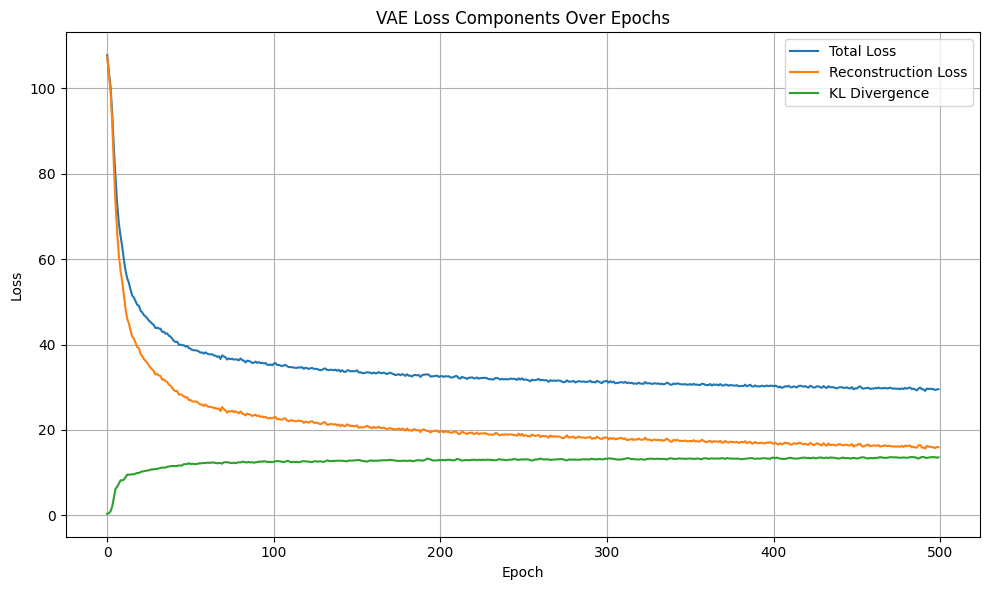

In [8]:
plot_vae_losses(total_loss_hist, recon_loss_hist, kld_loss_hist)

dim of latent mu: (331, 10)


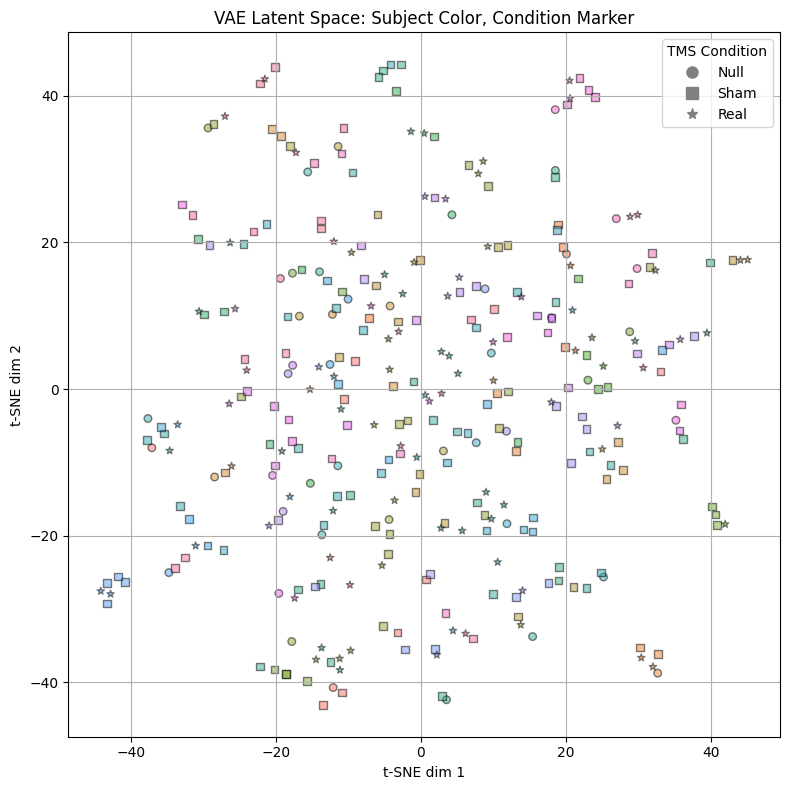

In [9]:
mu_all = get_latent_mu(model, X_tensor, device=DEVICE)
# 2d-TSNE
z_2d = TSNE(n_components=2, perplexity=8).fit_transform(mu_all)
plot_latent_embedding_by_condition_and_subject(z_2d, all_tms_type, all_subject_id)

Paired t-test: t = -2.326, p = 0.0246


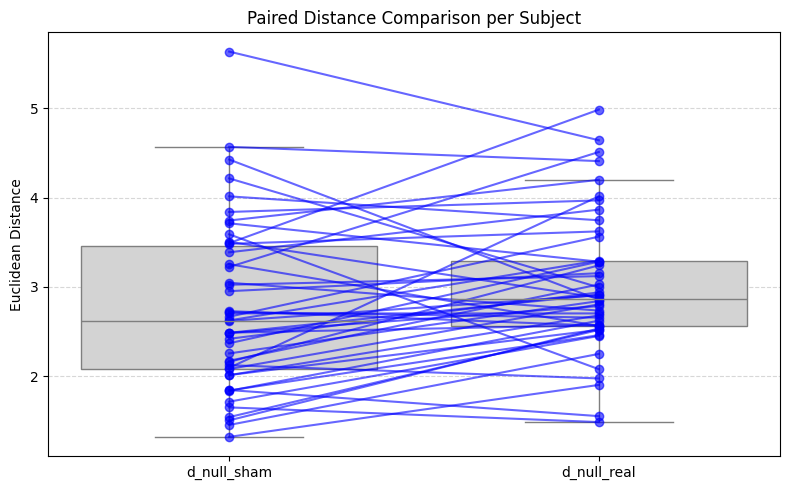

In [10]:
df = compute_condition_distances(mu_all, all_tms_type, all_subject_id, condition_map)

# Paired t-test
t_stat, p_val_t = ttest_rel(df["d_null_sham"], df["d_null_real"])
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_val_t:.4f}")
plot_subject_distance_comparison(df)